# Mineração de dados - Kickstarter Projects

Universidade do Vale do Taquari – Univates

Inteligência Artificial 2020/B

Autores: Arthur Meurer Saraiva, Marcelo Zerbieli Nicaretta e Matheus Michels

## Seleção

Usaremos a base de projetos do Kickstarter, o maior site de financiamento coletivo do mundo, para identificar os motivos do sucesso ou fracasso dos projetos.

O Dataset contém os mais de 378 mil projetos do Kickstarter até janeiro de 2018 e está disponível na plataforma [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects).

In [24]:
import pandas as pd

projects = pd.read_csv('ks-projects-201801.csv')

### Atributos da base
- name = nome do projeto;
- category = categoria do projeto;
- main_category = área do projeto;
- currency = moeda para os valores do projeto;
- deadline = data limite para o objetivo ser alcançado;
- goal = quantidade esperada de arrecadação para desenvolvimento do projeto (objetivo);
- launched = data de lançamento do projeto na plataforma;
- pledged = quantidade arrecadada;
- state = estado do projeto (sucesso, cancelamento, falha, em progresso e indefinido);
- backers = número de doadores do projeto;
- country = país dos autores da ideia;
- usd_pledged = valor arrecadado convertido para dólares (conversão feita pelo KS);
- usd_pledged_real = valor arrecadado convertido para dólares (conversão feita pela api [Fixer](https://fixer.io/));
- usd_goal_real = valor esperado e arrecadação convertido para dólares (conversão feita pela api [Fixer](https://fixer.io/)).

### Objetivo
O objetivo desse projeto é traçar relações entre os atributos para identificar as características mais presentes no sucesso ou no fracasso de um projeto em uma startup.

### Hipótesis
- Projetos com maior número de apoiadores, possuem mais chance de sucesso;
- Quanto maior a duração, mais chance de sucesso;
- O sucesso ou fracasso do projeto está fortemente ligado ao alcance ou não da meta.

## Preparação dos dados

In [25]:
print("\nShape")
print(projects.shape)

print("\nData types")
print(projects.dtypes)


Shape
(378661, 15)

Data types
ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


### Atributos relevantes
Desta base de projetos usaremos os seguintes atributos:
- main_category = área de atuação do projeto;
- deadline = data limite para o objetivo ser alcançado;
- goal = quantidade esperada de arrecadação para desenvolvimento do projeto (objetivo);
- launched = data de lançamento do projeto na plataforma;
- pledged = quantidade arrecadada;
- state = estado do projeto (sucesso, cancelamento, falha, em progresso e indefinido);
- backers = número de doadores do projeto;
- country = país dos autores da ideia.

In [26]:
projects = projects[['main_category', 'deadline', 'goal', 'launched', 'state', 'backers', 'country', 'pledged']]

print(projects.head())

  main_category    deadline     goal             launched     state  backers  \
0    Publishing  2015-10-09   1000.0  2015-08-11 12:12:28    failed        0   
1  Film & Video  2017-11-01  30000.0  2017-09-02 04:43:57    failed       15   
2  Film & Video  2013-02-26  45000.0  2013-01-12 00:20:50    failed        3   
3         Music  2012-04-16   5000.0  2012-03-17 03:24:11    failed        1   
4  Film & Video  2015-08-29  19500.0  2015-07-04 08:35:03  canceled       14   

  country  pledged  
0      GB      0.0  
1      US   2421.0  
2      US    220.0  
3      US      1.0  
4      US   1283.0  


In [27]:
projects.isnull().sum()

main_category    0
deadline         0
goal             0
launched         0
state            0
backers          0
country          0
pledged          0
dtype: int64

### Visualização gráfica

In [28]:
import matplotlib 
from matplotlib import pyplot as plt

#### Categorias

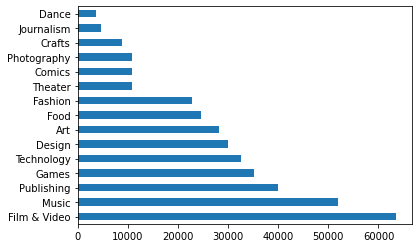

In [29]:
category = projects['main_category']
fig = plt.figure()
fig.add_axes(category.value_counts().plot.barh())
plt.show()

- Film & Video possuem mais projetos;
- Dança e jornalismo possuem menos projetos.

#### Deadline

In [30]:
deadlines = projects['deadline']
print('Data mínima: ' + deadlines.min())
print('Data máxima: ' + deadlines.max())

Data mínima: 2009-05-03
Data máxima: 2018-03-03


#### Goal

In [31]:
goal = projects['goal']

print('Mínimo: %d' % goal.min())
print('Máximo: %d' % goal.max())
print('Média: %d' % goal.mean())
print('Mediana: %d' % goal.median())
print('Moda: %d' % goal.mode())

Mínimo: 0
Máximo: 100000000
Média: 49080
Mediana: 5200
Moda: 5000


#### Launched

In [32]:
launched = projects['launched']
print('Data mínima: ' + launched.min())
print('Data máxima: ' + launched.max())

Data mínima: 1970-01-01 01:00:00
Data máxima: 2018-01-02 15:02:31


#### Pledged

In [33]:
pledged = projects['pledged']

print('Mínimo: %d' % pledged.min())
print('Máximo: %d' % pledged.max())
print('Média: %d' % pledged.mean())
print('Mediana: %d' % pledged.median())
print('Moda: %d' % pledged.mode())

Mínimo: 0
Máximo: 20338986
Média: 9682
Mediana: 620
Moda: 0


#### State

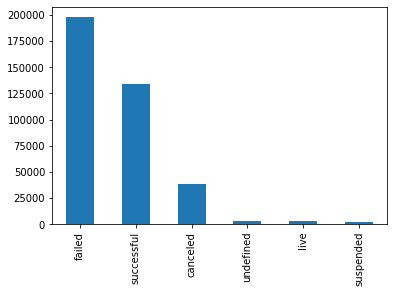

In [34]:
state = projects['state']
fig = plt.figure()
fig.add_axes(state.value_counts().plot.bar())
plt.show()

#### Backers

In [35]:
backers = projects['backers']

print('Mínimo: %d' % backers.min())
print('Máximo: %d' % backers.max())
print('Média: %d' % backers.mean())
print('Mediana: %d' % backers.median())
print('Moda: %d' % backers.mode())

Mínimo: 0
Máximo: 219382
Média: 105
Mediana: 12
Moda: 0


#### Country

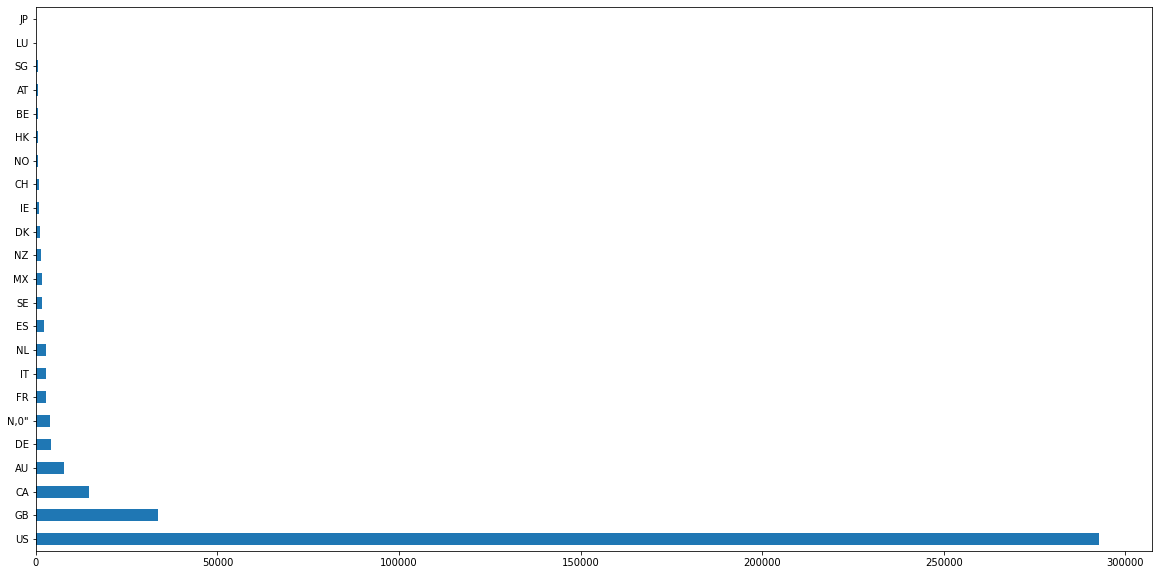

In [36]:
country = projects['country']
fig = plt.figure(figsize=[20, 10])
fig.add_axes(country.value_counts().plot.barh())
plt.show()

### Limpeza dos dados

Identificamos algumas colunas com valores que serão descartados:
- goal: valores zerados;
- launched: valores com data = '1970-01-01 01:00:00' (data 'zero');
- state: manteremos apenas projetos com state = 'successful' ou 'failed';

In [37]:
# filter goal
projects = projects[projects['goal'] > 0]
# filter launched
projects = projects[projects['launched'] != '1970-01-01 01:00:00']
# filter state
projects = projects[projects['state'].isin(['successful', 'failed'])]

print(projects['goal'].min())
print(projects['launched'].min())
print(projects['state'].unique())

0.01
2009-04-21 21:02:48
['failed' 'successful']


### Transformação

Precisamos modificar os seguintes atributos:
- Deadline: converter string para datetime e agrupar por mês;
- Goal: agrupar valores por milhares;
- Launched: converter string para datetime e agrupar por mês;
- Pledged: agrupar valores por milhares;
- State: categorizar valores (failed - 0 e successful - 1);

Além disso, criaremos novos atributos para duração e resultado do projeto:
- duration = diferença entre deadline e launched;
- result = não atingiu a meta = -1 | atingiu exatemente a meta = 0 | atingiu e passou a meta = 1;

In [39]:
# Deadline
projects['deadline'] = pd.to_datetime(projects['deadline'])

# Goal

# Launched
projects['launched'] = pd.to_datetime(projects['launched'])

# Pledged

# State
projects['state_value'], uniques = pd.factorize(projects['state'], sort=True)
# Duration
projects['duration'] = [deadline - launched for (deadline, launched) in zip(projects['deadline'], projects['launched'])]

# Result
projects['result'] = [pledged - goal for (pledged, goal) in zip(projects['pledged'], projects['goal'])]
projects['result'] = [result if result == 0 else (result / abs(result)) for result in projects['result']]

print('Deadline:', projects['deadline'].dtype)
print('Launched:', projects['launched'].dtype)
print('State:', uniques, projects['state_value'].unique())
print('Duration:', projects['duration'].dtype)
print('Result:', projects['result'].unique())

Deadline: datetime64[ns]
Launched: datetime64[ns]
State: Index(['failed', 'successful'], dtype='object') [0 1]
Duration: timedelta64[ns]
Result: [-1.  1.  0.]


#### Estatísticas gerais do dataset

In [40]:
print(projects.describe(include='all', datetime_is_numeric=True))

       main_category                       deadline          goal  \
count         331675                         331675  3.316750e+05   
unique            15                            NaN           NaN   
top     Film & Video                            NaN           NaN   
freq           56527                            NaN           NaN   
mean             NaN  2014-10-05 23:30:47.643627008  4.425157e+04   
min              NaN            2009-05-03 00:00:00  1.000000e-02   
25%              NaN            2013-05-01 00:00:00  2.000000e+03   
50%              NaN            2014-12-09 00:00:00  5.000000e+03   
75%              NaN            2016-04-09 00:00:00  1.500000e+04   
max              NaN            2018-01-02 00:00:00  1.000000e+08   
std              NaN                            NaN  1.117917e+06   

                             launched   state        backers country  \
count                          331675  331675  331675.000000  331675   
unique                     